In [1]:
from numpy import *
from numpy.linalg import *
import matplotlib.pyplot as plt
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()-2
from TB import *
plt.style.use('dark_background')
# plt.style.use('default')

In [2]:
 from __future__ import division

In [3]:
n=101
l=117
m=275-217
mg=array([zeros(n),linspace(3.1,0,n)]).T
gk=array([linspace(0,2.1,l),linspace(0,2.1,l)]).T
km=array([linspace(2.1,0,m),-1/2.1*linspace(2.1,0,m)+3.1]).T
path=concatenate([mg,gk,km])

In [4]:
hr = read_hr('NbSe2_hr','NbSe2_sym')

In [5]:
model = TB(data=hr, nbnd=11, points=263, fe=-1.1947)

In [6]:
band = array(model.eig(path)[0]).T

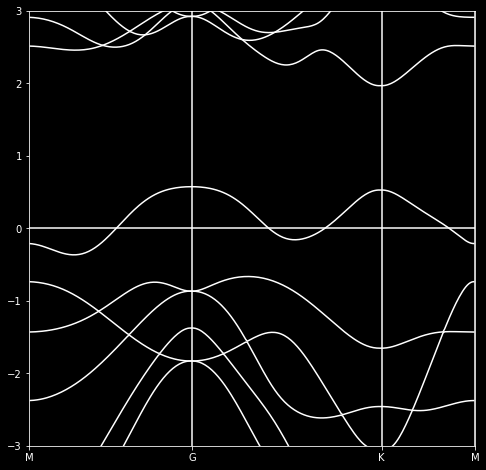

In [7]:
plt.figure(figsize=(8,8))
for i in range(11):
    plt.plot(band[i] +1.1947,c="white")
       
        
plt.xticks(ticks=[0,len(mg),len(mg)+len(gk),len(mg)+len(gk)+len(km)],labels=["M","G","K","M"])
plt.plot([0,0],[plt.ylim()[0],plt.ylim()[1]],color="black")
plt.plot([len(mg),len(mg)],[plt.ylim()[0],plt.ylim()[1]],color="white")
plt.plot([len(mg)+len(gk),len(mg)+len(gk)],[plt.ylim()[0],plt.ylim()[1]],color="white")
plt.plot([len(mg)+len(gk)+len(km),len(mg)+len(gk)+len(km)],[plt.ylim()[0],plt.ylim()[1]],color="white")
plt.plot([plt.xlim()[0],plt.xlim()[1]],[0,0],color="white")
plt.xlim(0,len(path))
plt.ylim(-3,3)
plt.show()

In [8]:
gvec =  array([[ 1.809830 ,1.044906  ],[0, 2.089811]])
qvec =  array([[0,1],[sqrt(3)/2,-1/2],[-sqrt(3)/2,-1/2]])*1.05

In [9]:
xx= linspace(-7,7,150)
left =array([ array([xx,]*len(xx)).reshape(-1)])
right =  array([kron(xx,ones(len(xx)))])
conc = concatenate((right,left),axis=0).T
conc_rot = dot(conc,gvec)

In [10]:
sol = model.parallel_solver(conc)

In [11]:
df = pd.DataFrame()
df['kx']=conc_rot.T[0]/3/norm(gvec[0])
df['ky']=conc_rot.T[1]/3/norm(gvec[0])
df['E']=sol[6]
zone = df.query("{} <= kx <= {}".format(-2.5,2.5)).query("{} <= ky <= {}".format(-2.5,2.5))

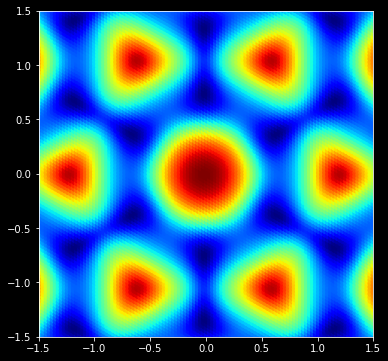

In [12]:
fig = plt.figure(figsize=(6,6))
plt.scatter(zone.kx,zone.ky,c=zone.E,cmap='jet')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

In [13]:
fs = df.query("-0.02<= E<=0.02")
fs_zone = zone.query("-0.02<= E<=0.02")

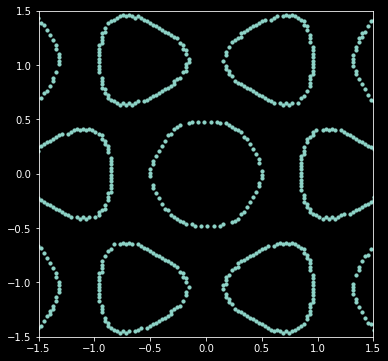

In [14]:
fig = plt.figure(figsize=(6,6))
plt.scatter(fs_zone.kx,fs_zone.ky,s=10)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

$$\chi(\vec{q}) =\frac{1}{N}\sum_k^N \frac{fd(\xi_k)-fd(\xi_{k+q})}{\xi_{k}-\xi_{k+q}}$$

In [15]:
xk = model.parallel_solver(conc)[6]

In [16]:
fk = model.fermi(xk)

In [ ]:
%time
sus = [model.suscep(q, conc,xk,fk) for q in conc]

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.2 µs


In [ ]:
fig = plt.figure(figsize=(7,5))
plt.scatter(df.x,df.y,c=array(p0sus).T[2],cmap="jet")
plt.xlim(-7,7)
plt.ylim(-5,5)
plt.show()

In [18]:
p0sus = [p0.suscep(q, conc) for q in conc]

In [19]:
p6sus = [p6.suscep(q, conc) for q in conc]

In [20]:
append(conc[0],0)

array([-9., -9.,  0.])